In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize']=[10,8]
mpl.rcParams['axes.grid']=False

In [2]:
# importer la base de données
db =pd.read_csv('Tout.csv', sep=";" ,encoding = "ISO-8859-1")
db=db.drop(['Température Sèche Air Extérieur'],axis=1)
db_Meteo =pd.read_csv('Meteo2002.csv', sep=";" ,encoding = "ISO-8859-1")
db=db.stack().str.replace(',','.').unstack()
db_Meteo=db_Meteo.stack().str.replace(',','.').unstack()
db1=pd.merge(db_Meteo,db, on='Date/Heure')

db1=db1.drop(['Date/Heure'],axis=1)
db_date=db['Date/Heure']
db1=db1.iloc[1:]
db1.iloc[:,:] = db1.iloc[:,:].astype(float)

# periode avril octobre
#db1=db1[2200:6600]

# préparation de la base de données
target="Température d'air"
df=db1.iloc[:,[0,1,2,3,4,5,13,15,21,24]]
df=db1
df['Date']=db['Date/Heure']
#X=db.drop([target],axis=1)


In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8761 entries, 0 to 8760
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Vitrage                                  8761 non-null   object
 1   Murs                                     8761 non-null   object
 2   Planchers sur terre-plein                8761 non-null   object
 3   Toits                                    8761 non-null   object
 4   Vent Méca + Vent Nat Ext + Infiltration  8761 non-null   object
 5   Infiltration extérieure                  8761 non-null   object
 6   Chauffage de zone                        8761 non-null   object
 7   Eclairage général                        8761 non-null   object
 8   Informatiques + Equip.                   8761 non-null   object
 9   Occupation                               8761 non-null   object
 10  Apports solaires Fenêtres extérieures    8761 non-null   obj

In [4]:
df['Date']=pd.to_datetime(df['Date'], infer_datetime_format=True)

In [5]:
df.columns

Index(['Température Sèche Air Extérieur',
       'Température Point de rosée Air Extérieur', 'Solaire Direct Normal',
       'Solaire Diffus Horizontal', 'Vitesse Vent', 'Direction Vent',
       'Pression Atmosphérique', 'Altitude Solaire', 'Azimut Solaire',
       'Vitrage', 'Murs', 'Planchers sur terre-plein', 'Toits',
       'Vent Méca + Vent Nat Ext + Infiltration', 'Infiltration extérieure',
       'Chauffage de zone', 'Eclairage général', 'Informatiques + Equip.',
       'Occupation', 'Apports solaires Fenêtres extérieures',
       'Chaleur sensible zone', 'Température d'air', 'Température radiante',
       'Température opérative', 'Electricité pour la zone', 'Eclairage',
       'Chauffage (Gaz)', 'ECS (Gaz)', 'Date'],
      dtype='object')

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

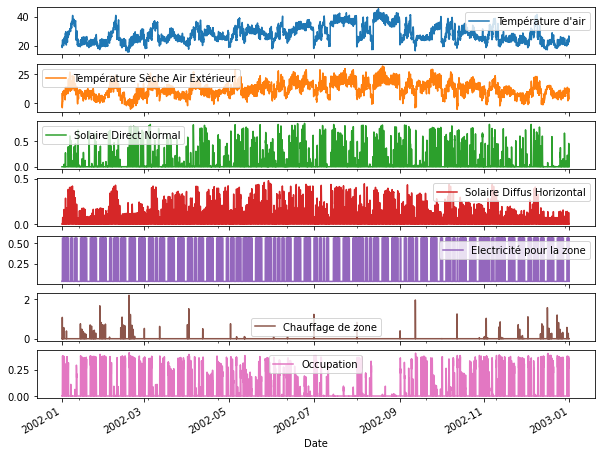

In [6]:
df.set_index('Date')[["Température d'air",'Température Sèche Air Extérieur','Solaire Direct Normal','Solaire Diffus Horizontal','Electricité pour la zone',"Chauffage de zone",'Occupation']].plot(subplots=True)

array([<AxesSubplot:xlabel='Date'>], dtype=object)

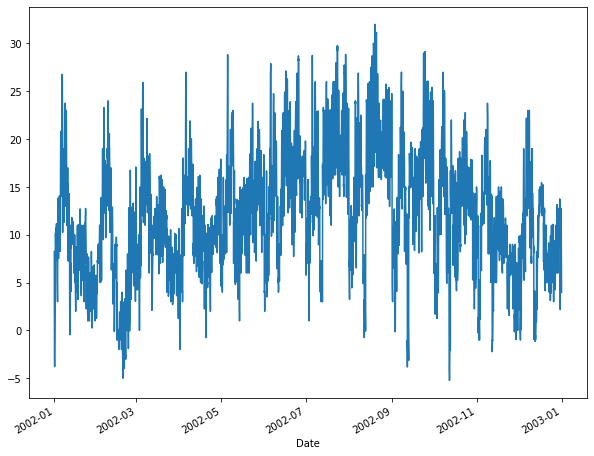

In [7]:
df.set_index('Date')['Température Sèche Air Extérieur'].plot(subplots=True)

In [8]:
df_input=df[["Température d'air",'Température Sèche Air Extérieur',
       'Température Point de rosée Air Extérieur', 'Solaire Direct Normal',
       'Solaire Diffus Horizontal', 'Vitesse Vent', 
       'Altitude Solaire', 'Azimut Solaire',
       'Vent Méca + Vent Nat Ext + Infiltration', 
       'Chauffage de zone',  'Informatiques + Equip.',
       'Occupation',  'Electricité pour la zone', 'Eclairage',
       'Chauffage (Gaz)','Occupation']]

df_input=df[[ "Température d'air",'Température Sèche Air Extérieur',
      ]]

In [9]:
df["Température Sèche Air Extérieur"].iloc[0]

1.775

In [10]:
df_input.shape[1]

2

In [11]:
df_input

,Température d'air,Température Sèche Air Extérieur
1,19.86205,1.775
2,19.47397,-1.575
3,19.22589,-2.825
4,18.99071,-3.475
5,18.78333,-3.675
...,...,...
8756,25.81697,6.725
8757,24.10030,6.225
8758,23.37062,5.350
8759,22.86883,3.975


In [12]:
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(df_input)

In [13]:
features=data_scaled
target=data_scaled[:,0]

In [14]:

features

array([[0.14038797, 0.18804567],
       [0.1274198 , 0.09805238],
       [0.11912989, 0.0644728 ],
       ...,
       [0.25763118, 0.28408328],
       [0.24086325, 0.24714574],
       [0.22659619, 0.19879113]])

In [15]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.14038797, 0.18804567],
         [0.1274198 , 0.09805238]]]),
 array([0.11912989]))

In [16]:
x_test

NameError: name 'x_test' is not defined

In [17]:
x_train,x_test,y_train,y_test = train_test_split(features, target, test_size=0.20, shuffle =False)

In [18]:
win_length=170
batch_size=32
num_features=df_input.shape[1]
train_generator = TimeseriesGenerator(x_train, y_train, length= win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length= win_length, sampling_rate=1, batch_size=batch_size)

In [19]:
#train_generator[0]

In [20]:
# 
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape=(win_length,num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))



In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 170, 128)          67072     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 170, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 170, 128)          131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 170, 128)          0         
_________________________________________________________________
dropout (Dropout)            (None, 170, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [22]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                 patience=10,
                                                 mode='min')
model.compile(loss=tf.losses.MeanSquaredError(),
             optimizer=tf.optimizers.Adam(),
             metrics=[tf.metrics.MeanAbsoluteError()])
history = model.fit_generator(train_generator, epochs=1000,
                             validation_data=test_generator,
                             shuffle=False,
                             callbacks=[early_stopping])

C:\Users\ahmed\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


ValueError: Failed to find data adapter that can handle input: <class 'keras.preprocessing.sequence.TimeseriesGenerator'>, <class 'NoneType'>

In [57]:
model.evaluate_generator(test_generator, verbose=0)

NameError: name 'model' is not defined

In [48]:
predictions= model.predict_generator(test_generator)

In [49]:
type(test_generator)

tensorflow.python.keras.preprocessing.sequence.TimeseriesGenerator

In [50]:
y_test

array([0.57230675, 0.59608643, 0.63233464, 0.67237306, 0.70717532,
       0.69233962, 0.61269366, 0.54803716, 0.51383847, 0.57733584,
       0.63909913, 0.57884346, 0.55089645, 0.53165022, 0.51544699,
       0.50602587, 0.49732465, 0.48788767, 0.4786842 , 0.46955342,
       0.46178355, 0.45503537, 0.51348998, 0.54005538, 0.55465185,
       0.5678341 , 0.60006917, 0.65425204, 0.70742292, 0.74709963,
       0.76294996, 0.78564716, 0.78810377, 0.77408048, 0.75864428,
       0.68460764, 0.64481198, 0.6088193 , 0.58292665, 0.5733813 ,
       0.56152736, 0.55054399, 0.5407224 , 0.53090477, 0.52125148,
       0.51302871, 0.54657976, 0.57643223, 0.61169533, 0.65475472,
       0.70393362, 0.75889188, 0.80454402, 0.8438088 , 0.85686329,
       0.87094385, 0.87618441, 0.8627647 , 0.84320038, 0.76270148,
       0.71670834, 0.67630953, 0.65933752, 0.64320566, 0.63047852,
       0.619159  , 0.60820382, 0.59746717, 0.58752178, 0.57870997,
       0.60960527, 0.63499876, 0.6521937 , 0.66421593, 0.68429

In [51]:
x_test[:,1:][win_length:]

array([[0.60534351, 0.74356223, 0.07493388, ..., 0.        , 0.        ,
        0.        ],
       [0.56946565, 0.72424893, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.52290076, 0.72746781, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.36183206, 0.46244635, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.35725191, 0.46888412, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33587786, 0.472103  , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [52]:
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [53]:
pd.DataFrame(predictions)

,0
0,0.380224
1,0.408491
2,0.388399
3,0.374122
4,0.361720
...,...
625,0.608619
626,0.565722
627,0.534250
628,0.509847


In [54]:
rev_trans=scaler.inverse_transform(df_pred)

In [55]:
rev_trans

array([[31.51877698, 19.075     , 15.325     , ...,  0.        ,
         0.        ,  0.        ],
       [32.16038864, 17.9       , 14.875     , ...,  0.        ,
         0.        ,  0.        ],
       [31.70433984, 16.375     , 14.95      , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [35.01485891, 11.1       ,  8.775     , ...,  0.        ,
         0.        ,  0.        ],
       [34.46095462, 10.95      ,  8.925     , ...,  0.        ,
         0.        ,  0.        ],
       [34.07779821, 10.25      ,  9.        , ...,  0.        ,
         0.        ,  0.        ]])

In [56]:
df_final=df_input[predictions.shape[0]*-1:]

In [57]:
df_final.count()

Température d'air                           630
Température Sèche Air Extérieur             630
Température Point de rosée Air Extérieur    630
Solaire Direct Normal                       630
Solaire Diffus Horizontal                   630
Vitesse Vent                                630
Direction Vent                              630
Pression Atmosphérique                      630
Altitude Solaire                            630
Azimut Solaire                              630
Vitrage                                     630
Murs                                        630
Planchers sur terre-plein                   630
Toits                                       630
Vent Méca + Vent Nat Ext + Infiltration     630
Infiltration extérieure                     630
Chauffage de zone                           630
Eclairage général                           630
Informatiques + Equip.                      630
Occupation                                  630
Apports solaires Fenêtres extérieures   

In [58]:
df_final['T_Air_pred']=rev_trans[:,0]

<ipython-input-58-e61114908f37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['T_Air_pred']=rev_trans[:,0]


In [59]:
df_final

,Température d'air,Température Sèche Air Extérieur,Température Point de rosée Air Extérieur,Solaire Direct Normal,Solaire Diffus Horizontal,Vitesse Vent,Direction Vent,Pression Atmosphérique,Altitude Solaire,Azimut Solaire,...,Occupation,Apports solaires Fenêtres extérieures,Chaleur sensible zone,Température radiante,Température opérative,Electricité pour la zone,Eclairage,Chauffage (Gaz),ECS (Gaz),T_Air_pred
5971,31.50327,19.075,15.325,0.06375,0.05425,2.075,0.0,102300.0,8.323690,270.9159,...,0.0,0.190123,0.0,30.86675,31.18501,0.564960,0.0,0.0,0.0,31.518777
5972,30.85511,17.900,14.875,0.00000,0.00350,1.275,0.0,102300.0,-1.783033,281.9020,...,0.0,0.011078,0.0,30.68215,30.76863,0.030474,0.0,0.0,0.0,32.160389
5973,30.36713,16.375,14.950,0.00000,0.00000,0.250,0.0,102300.0,-11.478070,293.3116,...,0.0,0.000000,0.0,30.32150,30.34432,0.030474,0.0,0.0,0.0,31.704340
5974,29.92524,16.000,14.250,0.00000,0.00000,1.125,15.0,102300.0,-20.328210,305.7963,...,0.0,0.000000,0.0,30.06318,29.99421,0.030474,0.0,0.0,0.0,31.380284
5975,29.67777,15.250,12.500,0.00000,0.00000,1.125,35.0,102300.0,-27.787920,319.9430,...,0.0,0.000000,0.0,29.82521,29.75149,0.030474,0.0,0.0,0.0,31.098781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6596,35.86241,14.150,9.050,0.00000,0.00000,1.000,300.0,102075.0,-10.716570,276.8122,...,0.0,0.000000,0.0,35.40811,35.63526,0.030474,0.0,0.0,0.0,36.702891
6597,34.79294,12.500,9.000,0.00000,0.00000,1.375,330.0,102175.0,-20.639460,288.4937,...,0.0,0.000000,0.0,34.82288,34.80791,0.030474,0.0,0.0,0.0,35.729213
6598,34.08356,11.100,8.775,0.00000,0.00000,1.950,347.5,102275.0,-29.854850,301.5878,...,0.0,0.000000,0.0,34.35482,34.21919,0.030474,0.0,0.0,0.0,35.014859
6599,33.74890,10.950,8.925,0.00000,0.00000,1.650,177.5,102300.0,-37.732440,316.9678,...,0.0,0.000000,0.0,34.00556,33.87723,0.030474,0.0,0.0,0.0,34.460955


<AxesSubplot:>

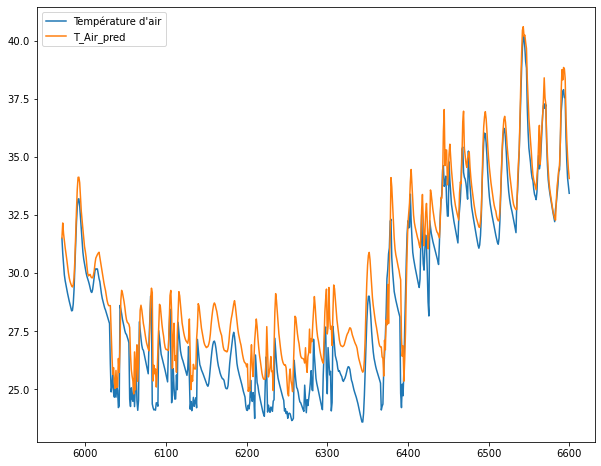

In [60]:
df_final[["Température d'air",'T_Air_pred']].plot()

In [12]:
df_final

NameError: name 'df_final' is not defined

In [20]:
df

,Température Sèche Air Extérieur,Température Point de rosée Air Extérieur,Solaire Direct Normal,Solaire Diffus Horizontal,Vitesse Vent,Direction Vent,Pression Atmosphérique,Altitude Solaire,Azimut Solaire,Vitrage,...,Apports solaires Fenêtres extérieures,Chaleur sensible zone,Température d'air,Température radiante,Température opérative,Electricité pour la zone,Eclairage,Chauffage (Gaz),ECS (Gaz),Date
1,1.775,-0.050,0.0,0.0,2.975,200.0,100250.0,-65.23919,13.62077,-0.404608,...,0.0,0.0,19.86205,20.05342,19.95773,0.030474,0.0,0.0,0.0,2002-01-01 01:00:00
2,-1.575,-3.075,0.0,0.0,2.100,180.0,100550.0,-64.74026,19.18481,-0.460932,...,0.0,0.0,19.47397,19.75839,19.61618,0.030474,0.0,0.0,0.0,2002-01-01 02:00:00
3,-2.825,-4.500,0.0,0.0,2.100,180.0,100425.0,-59.20219,46.38902,-0.478859,...,0.0,0.0,19.22589,19.49720,19.36154,0.030474,0.0,0.0,0.0,2002-01-01 03:00:00
4,-3.475,-5.250,0.0,0.0,2.100,150.0,100325.0,-50.76067,65.65237,-0.485849,...,0.0,0.0,18.99071,19.25871,19.12471,0.030474,0.0,0.0,0.0,2002-01-01 04:00:00
5,-3.675,-5.400,0.0,0.0,2.475,155.0,100300.0,-41.04934,79.86420,-0.484798,...,0.0,0.0,18.78333,19.04049,18.91191,0.030474,0.0,0.0,0.0,2002-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,6.725,5.950,0.0,0.0,3.100,212.5,101000.0,-22.81123,259.87770,-0.410168,...,0.0,0.0,25.81697,24.26463,25.04080,0.564960,0.0,0.0,0.0,2002-12-31 20:00:00
8757,6.225,5.675,0.0,0.0,3.100,225.0,101000.0,-32.94624,270.47950,-0.411723,...,0.0,0.0,24.10030,23.83736,23.96883,0.030474,0.0,0.0,0.0,2002-12-31 21:00:00
8758,5.350,4.925,0.0,0.0,3.850,215.0,101000.0,-43.05004,282.44630,-0.412044,...,0.0,0.0,23.37062,23.35889,23.36476,0.030474,0.0,0.0,0.0,2002-12-31 22:00:00
8759,3.975,3.500,0.0,0.0,3.350,210.0,100925.0,-52.61096,297.38030,-0.429880,...,0.0,0.0,22.86883,23.01877,22.94380,0.030474,0.0,0.0,0.0,2002-12-31 23:00:00
